In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

butaritari ki
port alfred za
kropotkin ru
albany au
inhambane mz
praia da vitoria pt
storforshei no
nikolskoye ru
pevek ru
gualeguay ar
comodoro rivadavia ar
cape town za
erdenet mn
mataura pf
necochea ar
puerto ayora ec
ushuaia ar
vila franca do campo pt
albany au
kodiak us
kapaa us
bethel us
qaanaaq gl
tazovskiy ru
tambo grande pe
rikitea pf
kapaa us
mataura pf
swan river ca
atuona pf
vao nc
arraial do cabo br
north bend us
maues br
barrow us
clyde river ca
bethel us
ginir et
kahului us
port alfred za
norman wells ca
hermanus za
warrnambool au
aklavik ca
tuatapere nz
khatanga ru
atuona pf
punta arenas cl
druskininkai lt
barentsburg sj
rikitea pf
cape town za
ushuaia ar
puerto ayora ec
mataura pf
broome au
broome au
mehamn no
ushuaia ar
karratha au
matara lk
puerto ayora ec
new norfolk au
atuona pf
mataura pf
chuy uy
nikolskoye ru
adrar dz
ushuaia ar
vaitupu wf
castro cl
egvekinot ru
rikitea pf
mahebourg mu
codrington ag
bethel us
hasaki jp
busselton au
maningrida au
vaini to
maniitso

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime
import time

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
len(cities)

611

In [13]:
# for i, city in enumerate(cities):
    # city_url = url + "&q=" + city.replace(" ","+")
   #  print(city_url)

In [14]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(65)
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

ey
Processing Record 3 of Set 4 | anadyr
Processing Record 4 of Set 4 | nemuro
Processing Record 5 of Set 4 | amga
Processing Record 6 of Set 4 | saskylakh
Processing Record 7 of Set 4 | san-pedro
Processing Record 8 of Set 4 | baruun-urt
Processing Record 9 of Set 4 | tura
Processing Record 10 of Set 4 | atambua
Processing Record 11 of Set 4 | fortuna
Processing Record 12 of Set 4 | vestmannaeyjar
Processing Record 13 of Set 4 | shizuishan
Processing Record 14 of Set 4 | mount pleasant
Processing Record 15 of Set 4 | provideniya
Processing Record 16 of Set 4 | ierapetra
Processing Record 17 of Set 4 | pathein
Processing Record 18 of Set 4 | georgetown
Processing Record 19 of Set 4 | meulaboh
Processing Record 20 of Set 4 | chepareria
Processing Record 21 of Set 4 | hilo
Processing Record 22 of Set 4 | yumen
Processing Record 23 of Set 4 | faya
Processing Record 24 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 25 of Set 4 | isangel
Processing Record 26 of Set 4 | 

In [15]:
len(city_data)

563

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.07,172.79,81.93,74,0,13.78,KI,2020-10-16 13:41:10
1,Port Alfred,-33.59,26.89,68.20,76,93,28.63,ZA,2020-10-16 13:41:10
2,Kropotkin,45.44,40.58,75.31,42,75,1.81,RU,2020-10-16 13:41:10
3,Albany,42.60,-73.97,52.00,88,100,0.69,US,2020-10-16 13:41:10
4,Inhambane,-23.86,35.38,77.09,62,0,13.82,MZ,2020-10-16 13:41:10
5,Praia Da Vitoria,38.73,-27.07,66.20,88,75,12.59,PT,2020-10-16 13:41:10
6,Storforshei,66.40,14.52,46.00,87,75,4.70,NO,2020-10-16 13:41:10
7,Nikolskoye,59.70,30.79,45.00,65,75,13.42,RU,2020-10-16 13:41:11
8,Pevek,69.70,170.31,37.51,82,78,13.40,RU,2020-10-16 13:41:11
9,Gualeguay,-33.14,-59.31,73.78,56,0,8.59,AR,2020-10-16 13:41:11


In [17]:
# Create the output file (CSV).
output_data_file = "C:/Users/golfz/Documents/GitHub/World_Weather_Analysis/weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [19]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1602856511.7708163

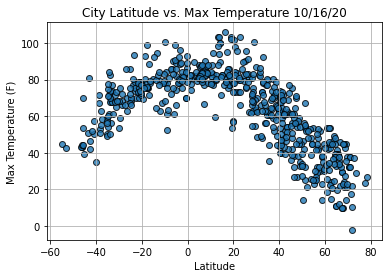

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

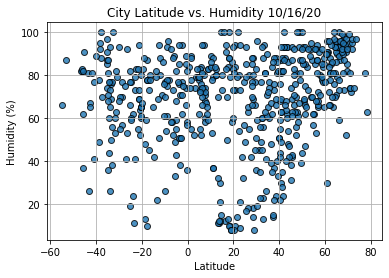

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

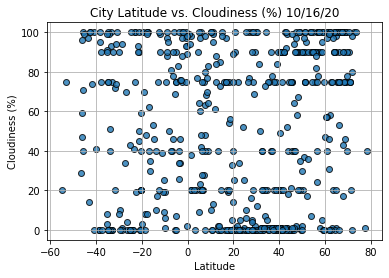

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

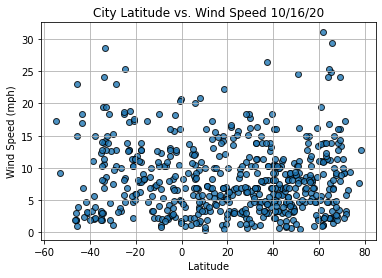

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [49]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [50]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.title(title)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [51]:
index13 = city_data_df.loc[13]
index13

City                      Mataura
Lat                        -46.19
Lng                        168.86
Max Temp                       43
Humidity                       82
Cloudiness                     59
Wind Speed                   1.99
Country                        NZ
Date          2020-10-16 13:41:11
Name: 13, dtype: object

In [52]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

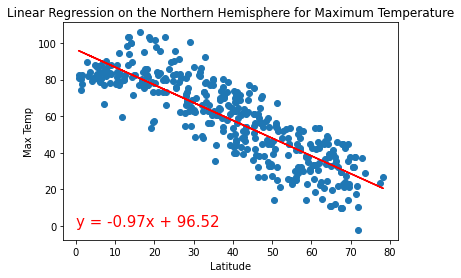

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(0,0))

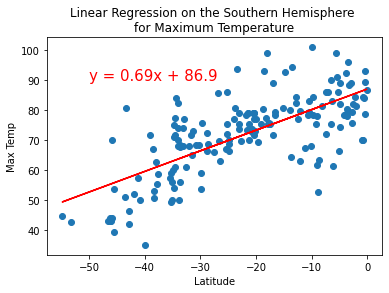

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

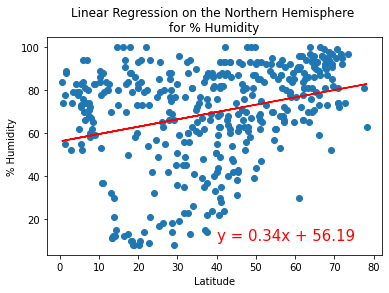

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

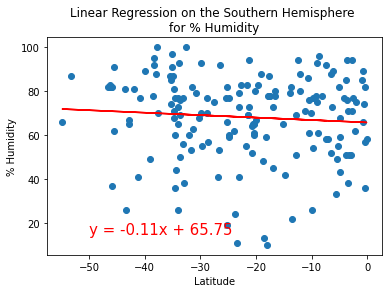

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

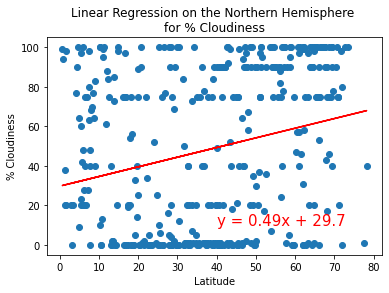

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(40,10))

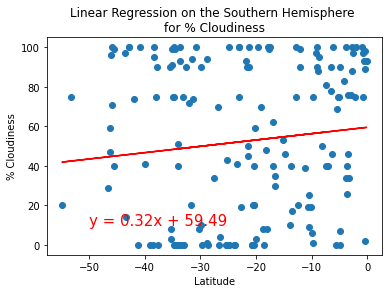

In [59]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,10))

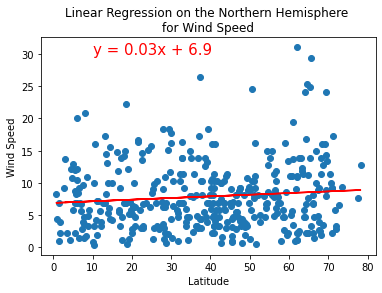

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(10,30))

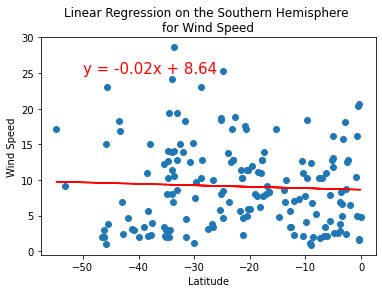

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,25))